# Cálculo de Corrente de Curto-Circuito em Baixa Tensão

Este exemplo ilustra como calcular a corrente de curto-circuito em dois pontos diferentes de um sistema elétrico simples de baixa tensão. O circuito possui uma fonte de tensão, uma impedância associada à fonte, e uma impedância representando a linha de transmissão.

---

## **Descrição do Sistema**

1. **Fonte de Tensão**: A tensão nominal da fonte é $V = 400 \, \text{V}$, com uma impedância interna $Z_f = 0.02 +j 0.1 \, \Omega$.
2. **Linha de Transmissão**: Representada por uma impedância $Z_l = 0.03 + j0.15 \, \Omega$.
3. **Pontos de Curto-Circuito**:
   - **Ponto A**: Localizado logo após a fonte, considerando apenas a impedância $Z_f$.
   - **Ponto B**: Localizado no final da linha, onde a impedância total é $Z_{total} = Z_f + Z_l$.

---

## **Fórmula para Corrente de Curto-Circuito**

A corrente de curto-circuito é calculada pela equação:

\begin{equation*}
I_{cc} = \frac{V}{|Z_{total}|}
\end{equation*}


Onde:
- $I_{cc}$: Corrente de curto-circuito (A).
- $V$: Tensão nominal (V).
- $Z_{total}$: Impedância total até o ponto de curto $(\Omega)$.
- $|Z_{total}|$: Módulo da impedância total.

---

## **Cálculos Realizados**

1. Para o **Ponto A**, a corrente de curto-circuito depende apenas da impedância da fonte ($Z_f$).
2. Para o **Ponto B**, a corrente de curto-circuito considera a soma das impedâncias da fonte e da linha ($Z_f + Z_l$).

---

## **Resultados Esperados**

- **Corrente no Ponto A**: A corrente será maior, pois a impedância é mínima.
- **Corrente no Ponto B**: A corrente será menor, pois a soma das impedâncias aumenta.

---

## **Código Python**

No exemplo fornecido, usamos Python para calcular a corrente de curto-circuito em ambos os pontos, apresentando também as impedâncias envolvidas para referência. O cálculo foi realizado utilizando números complexos para representar a resistência ($R$) e a reatância ($X$) do circuito.

---

## **Visualização**

Foi gerado um diagrama esquemático que ilustra:
- A fonte de tensão.
- As impedâncias da fonte e da linha.
- Os dois pontos de curto-circuito analisados.

Esse diagrama serve para facilitar a compreensão dos cálculos e destacar como a localização do curto afeta a corrente.


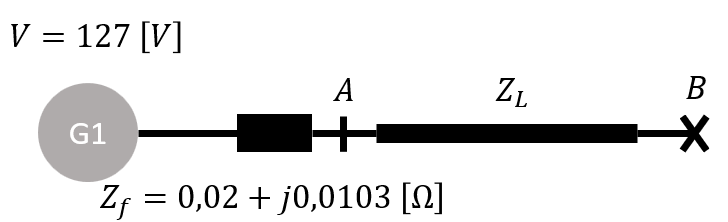

In [19]:
import numpy as np

# Dados do sistema
V_nominal = 127  # Tensão nominal (V)
FP = 0.9  # Fator de potência do curto
R_f = 0.02  # Resistência da fonte (ohms)

# Cálculo da reatância da fonte com base no fator de potência
phi = np.arccos(FP)  # Ângulo correspondente ao fator de potência

# Parâmetros do condutor
rho_copper = 1.68e-8  # Resistividade do cobre (ohm·m)
A_copper = 95e-6  # Área da seção transversal (m²)
X_l_per_km = 0.08  # Reatância indutiva aproximada (ohm/km)
L = 100  # Comprimento do condutor (m)

# Cálculo da resistência e reatância da linha
R_line = (rho_copper * L) / A_copper
X_line = (X_l_per_km * L) / 1000  # Converter para ohms
Z_l = R_line + X_line * 1j  # Impedância da linha como número complexo

X_f = (R_f+R_line) * np.tan(phi)-X_line  # Reatância da fonte
Z_f = R_f + X_f * 1j  # Impedância da fonte como número complexo

# Cálculo do curto-circuito no ponto A (próximo à fonte)
Z_total_A = Z_f  # Apenas a impedância da fonte
I_cc_A = V_nominal / abs(Z_total_A)  # Corrente de curto no ponto A (módulo)
print(f"Corrente de curto-circuito no ponto A: {I_cc_A:.2f} A")

# Cálculo do curto-circuito no ponto B (final da linha)
Z_total_B = Z_f + Z_l  # Soma da impedância da fonte e da linha
I_cc_B = V_nominal / abs(Z_total_B)  # Corrente de curto no ponto B (módulo)
print(f"Corrente de curto-circuito no ponto B: {I_cc_B:.2f} A")

# Valores das impedâncias para análise
print("\nImpedâncias:")
print(f"Impedância da fonte (Z_f): {Z_f:.4f} Ω")
print(f"Impedância da linha (Z_l): {Z_l:.4f} Ω")
print(f"Impedância total no ponto B (Z_total_B): {Z_total_B:.4f} Ω")


Corrente de curto-circuito no ponto A: 5650.93 A
Corrente de curto-circuito no ponto B: 3033.10 A

Impedâncias:
Impedância da fonte (Z_f): 0.0200+0.0103j Ω
Impedância da linha (Z_l): 0.0177+0.0080j Ω
Impedância total no ponto B (Z_total_B): 0.0377+0.0183j Ω



   #    $ I_k = \frac{\displaystyle 12,7}{\displaystyle \sqrt{\frac{162}{I_{k0}^2} + \frac{57 \cdot \cos \phi_{k0} \cdot \ell}{I_{k0} \cdot S}} + \frac{5 \ell^2}{S^2}} \quad (127/220 \ [V]).$
    



##*   $I_{k0}= 2157,28 \ [A] $
##*   $ \cos \phi_{k0}=0,9$
##*   $ \ell=50 \ [m] $
##*   $ S=95 \ [mm^2] $




In [22]:
# prompt: implement the equation above

import numpy as np

# Dados para a equação fornecida
Ik0 = 5.651  # A
cos_phi_k0 = 0.9
l = 50  # m
S = 95  # mm² (manter em mm² para consistência com a fórmula)

# Implementando a equação
# Note que a equação usa 127/220 em vez de V_nominal diretamente
# I_k é calculado com base na equação dada:
I_k = 12.7 / (np.sqrt((162 / (Ik0**2)) + ((57 * cos_phi_k0 * l) / (Ik0 * S))) + ((5 * (l**2)) / (S**2)))

print(f"Corrente de curto-circuito calculada pela equação fornecida (I_k) em B: {I_k:.2f} kA")

Corrente de curto-circuito calculada pela equação fornecida (I_k) em B: 2.81 kA


In [23]:
## Desvio Relativo dos cálculos

Desv_B=np.abs(I_k-I_cc_B/I_cc_B)*100

print(f"O desvio relativo do cálculo das correntes em B é: {I_k:.2f} %")

O desvio relativo do cálculo das correntes em B é: 2.81 %
